<a href="https://colab.research.google.com/github/ShakilaMhd/MNIST-Dataset/blob/main/Over_Underfitting_Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

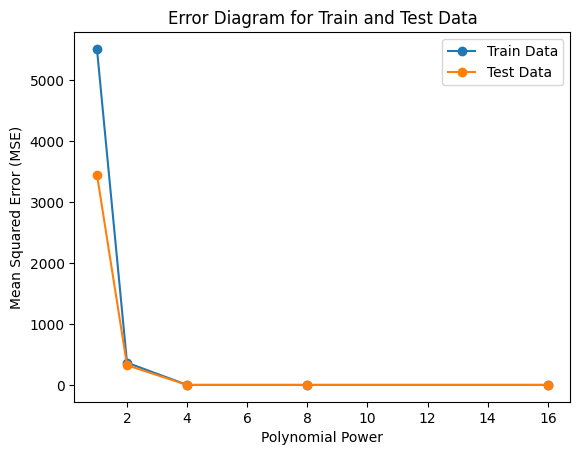

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate data using a quadratic equation: y = ax^2 + bx^3 + cx^4 + noise
np.random.seed(42)

# Generate random values for coefficients
a, b, c = np.random.rand(3)

# Generate x values
X = np.sort(5 * np.random.rand(200, 1), axis=0)

# Calculate y values using a quadratic equation with added noise
y = a * X**2 + b * X**3 + c * X**4 + np.random.randn(200) * 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot the data and the regression line
def plot_regression(X, y, model, title):
    plt.scatter(X_train, y_train, s=20, edgecolor="black", c="blue", label="Train Data")
    plt.scatter(X_test, y_test, s=20, edgecolor="black", c="turquoise", label="Test Data")
    plt.plot(X, model.predict(X), color="cornflowerblue", label="fit")
    plt.title(title)
    plt.legend()
    plt.show()

# Evaluate models
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    return mse

# Fit and evaluate models
degrees = [1, 2, 4, 8, 16]

mse_train = []
mse_test = []

for degree in degrees:
    # Polynomial Regression
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Evaluate the model on both training and testing data
    mse_train.append(evaluate_model(model, X_poly_train, y_train))
    mse_test.append(evaluate_model(model, X_poly_test, y_test))

# Plot the error diagram
plt.plot(degrees, mse_train, label='Train Data', marker='o')
plt.plot(degrees, mse_test, label='Test Data', marker='o')
plt.xlabel('Polynomial Power')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error Diagram for Train and Test Data')
plt.legend()
plt.show()
